In [1]:
import timeit

p = 20

In [2]:
# without recursion calculate factorial
def factorial(n):
    result = 1
    for i in range(1, n+1):
        result *= i
    return result


f = factorial(p)
elapsed_time = timeit.timeit(str((factorial(p))), number=10000)

print("Factorial of", p, "=", factorial(p))
print("Time measured :", elapsed_time, "seconds.")

Factorial of 20 = 2432902008176640000
Time measured : 8.690000004207832e-05 seconds.


In [3]:
# measure time to calculate factorial for different values of n
results = [range(1, 1000000, 100000),[]]
for i in results[0]:
    start = timeit.default_timer()
    factorial(i)
    stop = timeit.default_timer()
    results[1].append(stop - start)

print(results)

[range(1, 1000000, 100000), [1.5999999050109182e-06, 1.8000483999999233, 7.414671200000157, 17.32812520000016, 31.78949690000036, 59.62851139999975, 106.51592469999969, 161.31604160000006, 226.8987500999997, 294.38355560000036]]


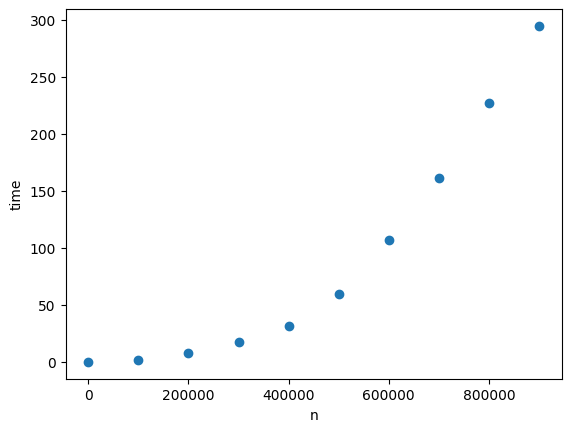

In [4]:
# plot results
import matplotlib.pyplot as plt

plt.scatter(results[0], results[1])
plt.xlabel('n')
plt.ylabel('time')
plt.show()

In [9]:
# fit a curve to the results
# type of curve is a * x ** b
import numpy as np
import scipy

def func(x, a):
    return a * np.power(x, 3.00000001)

popt, pcov = scipy.optimize.curve_fit(func, results[0], results[1])
print(popt)

[4.2838302e-16]


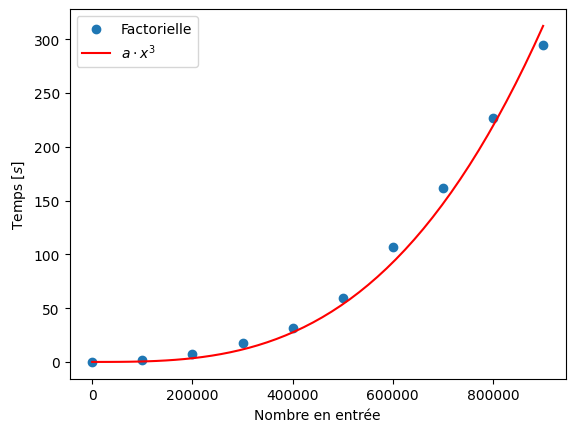

In [10]:
# plot results and curve
plt.scatter(results[0], results[1], label='Factorielle')
plt.plot(np.linspace(1,900000), func(np.linspace(1,900000), *popt), 'r-', label=r'$a \cdot x^3$')
plt.xlabel('Nombre en entrée')
plt.ylabel(r'Temps $[s]$')
plt.legend()
plt.show()

In [11]:
# using tikzplotlib to export plot to latex
import tikzplotlib

def tikzplotlib_fix_ncols(obj):
    """
    workaround for matplotlib 3.6 renamed legend's _ncol to _ncols, which breaks tikzplotlib
    """
    if hasattr(obj, "_ncols"):
        obj._ncol = obj._ncols
    for child in obj.get_children():
        tikzplotlib_fix_ncols(child)

def save_fig(name, width='10cm', height='10cm'):
    fig = plt.gcf()
    tikzplotlib_fix_ncols(fig)

    tikzplotlib.clean_figure()
    tikzplotlib.save(name + '.tex', axis_width=width, axis_height=height)

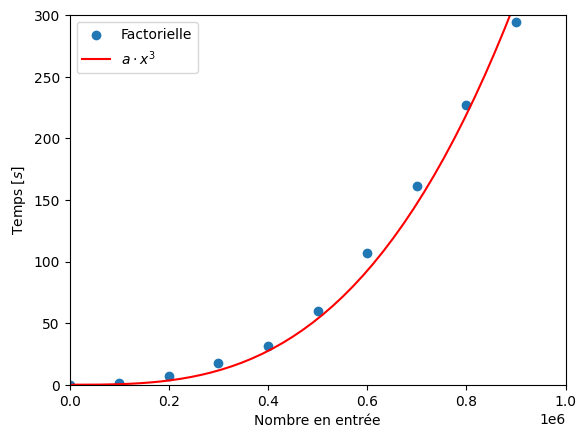

In [12]:
plt.scatter(results[0], results[1], label='Factorielle')
plt.plot(np.linspace(1,1000000), func(np.linspace(1,1000000), *popt), 'r-', label=r'$a \cdot x^3$')
plt.xlabel('Nombre en entrée')
plt.ylabel(r'Temps $[s]$')
plt.legend()
plt.xlim(0, 1000000)
plt.ylim(0, 300)
save_fig('factorial')